<a href="https://colab.research.google.com/github/sapna-90/Project_5_Telcom-data/blob/main/Telecom_P5_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import numpy as np
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn.decomposition import PCA
  from sklearn.preprocessing import StandardScaler

In [ ]:
Dataset_2 = pd.read_csv(r"/content/Project_5 - Data_cleaned.csv")

**User Engagement Analysis**

In [ ]:
from sklearn.cluster import KMeans

Engagement Metrics

In [ ]:
# Aggregating metrics per customer ID (MSISDN)
aggregated_data = Dataset_2.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum'
}).reset_index()

In [ ]:
# Calculating total traffic
aggregated_data['Total Traffic (Bytes)'] = aggregated_data['Total UL (Bytes)'] + aggregated_data['Total DL (Bytes)']

In [ ]:
# Normalize the metrics
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(aggregated_data[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Traffic (Bytes)']])

In [ ]:
# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
aggregated_data['Cluster'] = kmeans.fit_predict(normalized_metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Calculate minimum, maximum, average & total for each cluster
cluster_stats = aggregated_data.groupby('Cluster').agg({
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()

In [ ]:
# Aggregating total traffic per application and identifying the top 10 users per application
app_columns = ['Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
               'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
               'Other DL (Bytes)', 'Other UL (Bytes)']

In [ ]:
# Aggregating total traffic for each application
aggregated_apps = Dataset_2.groupby('MSISDN/Number')[app_columns].sum().reset_index()

In [ ]:
# Calculating total traffic for each application
aggregated_apps['Youtube Traffic'] = aggregated_apps['Youtube DL (Bytes)'] + aggregated_apps['Youtube UL (Bytes)']
aggregated_apps['Netflix Traffic'] = aggregated_apps['Netflix DL (Bytes)'] + aggregated_apps['Netflix UL (Bytes)']
aggregated_apps['Gaming Traffic'] = aggregated_apps['Gaming DL (Bytes)'] + aggregated_apps['Gaming UL (Bytes)']

In [ ]:
# Identifying top 10 users per application
top_10_youtube = aggregated_apps.sort_values(by='Youtube Traffic', ascending=False).head(10)
top_10_netflix = aggregated_apps.sort_values(by='Netflix Traffic', ascending=False).head(10)
top_10_gaming = aggregated_apps.sort_values(by='Gaming Traffic', ascending=False).head(10)

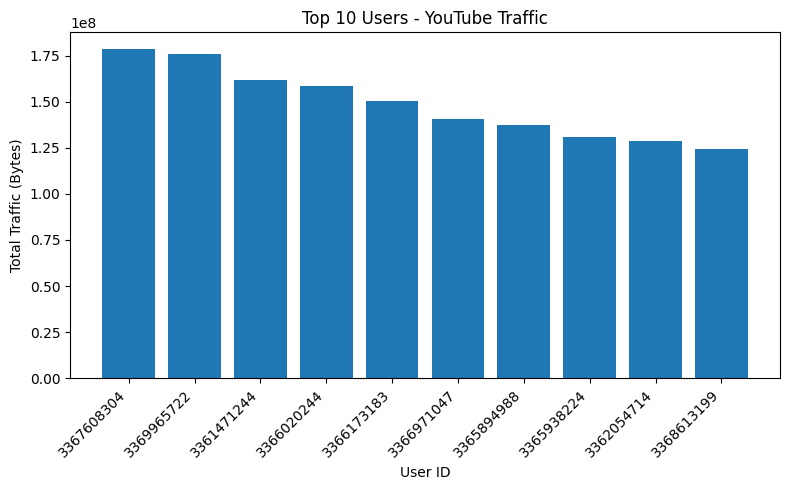

In [ ]:
# Convert 'MSISDN/Number' to strings and shorten them if necessary
top_10_youtube['User ID'] = top_10_youtube['MSISDN/Number'].astype(str).str[:10] # Shorten to 10 characters

plt.figure(figsize=(8, 5))
plt.bar(top_10_youtube['User ID'], top_10_youtube['Youtube Traffic'])
plt.title('Top 10 Users - YouTube Traffic')
plt.xlabel('User ID')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The bar chart shows each user's total YouTube traffic in bytes, with labels rotated and layout adjusted to ensure readability. This visualization helps to quickly identify the top users based on their YouTube data usage.

In [ ]:
Dataset_2.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube U

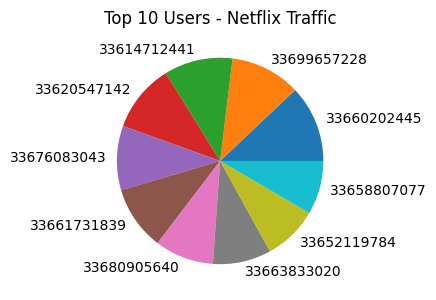

In [ ]:
# Plot for Netflix
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 2)
# Use 'Netflix Traffic' for the size of the wedges and 'MSISDN/Number' for labels
plt.pie(top_10_netflix['Netflix Traffic'], labels=top_10_netflix['MSISDN/Number'].astype(str))
plt.title('Top 10 Users - Netflix Traffic')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

The chart shows how Netflix traffic is distributed among the top 10 users, with adjustments made to the layout to ensure that the labels do not overlap, making the visualization clear and easy to interpret. This pie chart helps in understanding the relative contribution of each user to the total Netflix traffic among the top users.

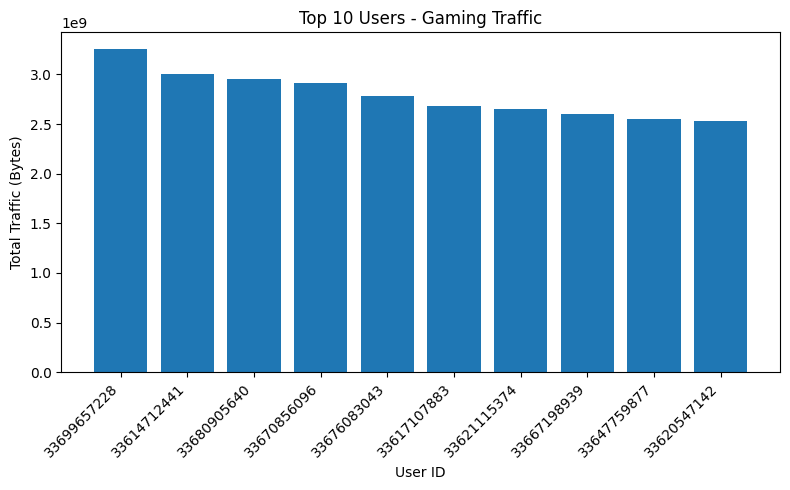

In [ ]:
# Plot for Gaming
plt.figure(figsize=(8, 5))
plt.bar(top_10_gaming['MSISDN/Number'].astype(str), top_10_gaming['Gaming Traffic'])
plt.title('Top 10 Users - Gaming Traffic')
plt.xlabel('User ID')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

This visualization provides a clear comparison of gaming traffic among the top 10 users, highlighting which users generate the most gaming data.

In [ ]:
# Using the Elbow method to determine the optimal number of clusters (k)
sse = []
silhouette_scores = []
k_values = range(1, 11)

In [ ]:
from sklearn.metrics import silhouette_score # import the silhouette_score function
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    sse.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(normalized_metrics, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

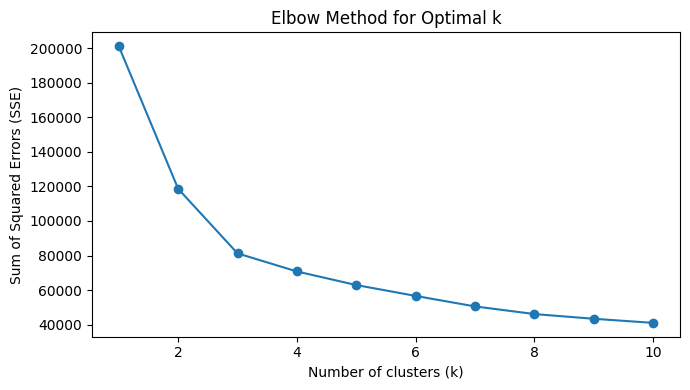

In [ ]:
# Plotting the SSE and silhouette scores
plt.figure(figsize=(7, 4))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.tight_layout()
plt.show()

 This visualization helps in identifying the "elbow" point in the curve, where the SSE begins to decrease at a slower rate, suggesting the optimal number of clusters for the dataset.

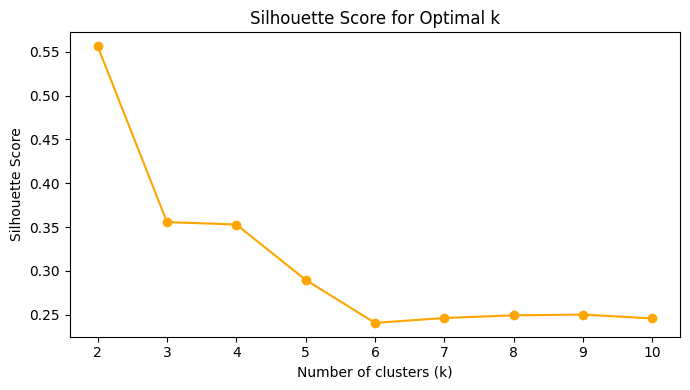

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(k_values[1:], silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

This visualization helps in selecting the optimal number of clusters by identifying where the silhouette scores are maximized, indicating the best clustering structure.






